# Use Pretrained Inception Full ImageNet Network
----
Based on mxnet example notebook "Inception-BatchNorm Network"

The pre-trained Inception Full ImageNet Network is able to be downloaded from:
[https://github.com/dmlc/mxnet-model-gallery/tree/master/imagenet-21k-inception](https://github.com/dmlc/mxnet-model-gallery/tree/master/imagenet-21k-inception)

In [76]:
%matplotlib inline
import mxnet as mx
import logging
import numpy as np
import time
# Note: The decoded image should be in BGR channel (opencv output)
# For RGB output such as from skimage, we need to convert it to BGR
# WRONG channel will lead to WRONG result
from skimage import io, transform

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [2]:
# Load the pre-trained model
prefix = "Inception/Inception"
num_round = 9
model = mx.model.FeedForward.load(prefix, num_round, ctx=mx.gpu(), numpy_batch_size=1)

In [23]:
# mean_image
mean_img = np.ones((3, 224, 224)) * 117

In [ ]:
# if you like, you can plot the network
# mx.viz.plot_network(model.symbol, shape={"data" : (1, 3, 224, 224)})

In [3]:
# load synset (text label)
synset = [l.strip() for l in open('Inception/synset.txt').readlines()]

In [81]:
def PreprocessImage(path, show_img=False):
    # load image
    img = io.imread(path)
    print("Original Image Shape: ", img.shape)
    io.imshow(img)
    io.show() 
    # we crop image from center
    # short_egde = min(img.shape[:2])
    # yy = int((img.shape[0] - short_egde) / 2)
    # xx = int((img.shape[1] - short_egde) / 2)
    short_egde = 70
    for col in range(4):
        for row in range(2):
            xx = 3  + (short_egde + 2) * col
            yy = 39 + (short_egde + 3) * row
            crop_img = img[yy : yy + short_egde, xx : xx + short_egde]
            # resize to 224, 224
            resized_img = transform.resize(crop_img, (224, 224))
            if show_img:
                io.imshow(resized_img)
                io.show() 
            # convert to numpy.ndarray
            sample = np.asarray(resized_img) * 256
            # swap axes to make image from (224, 224, 4) to (3, 224, 224)
            sample = np.swapaxes(sample, 0, 2)
            sample = np.swapaxes(sample, 1, 2)
            # sub mean 
            normed_img = sample - mean_img
            normed_img.resize(1, 3, 224, 224)
            yield normed_img

Then we will show how to use this model to classify image. The image was taken in Notre-Dame Basilica, Montreal.

('Original Image Shape: ', (190, 293, 3))


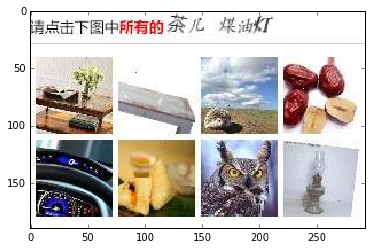

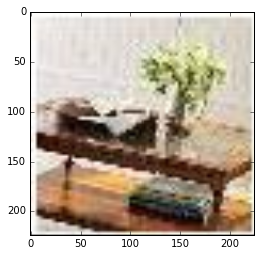

Top5 Prediction:
n03896526 Passe-partout,
n03002711 Chaise longue, chaise, daybed,
n03064758 Coffin, casket,
n03405725 Furniture, piece of furniture, article of furniture,
n04177820 Settle, settee
Time used: 0.387497901917 sec


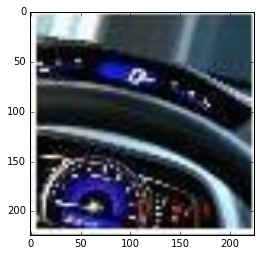

Top5 Prediction:
n04273796 Speedometer, speed indicator,
n04113316 Roulette ball,
n04382695 Tachograph,
n04113406 Roulette wheel, wheel,
n04113194 Roulette, toothed wheel
Time used: 0.266755819321 sec


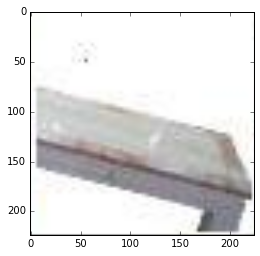

Top5 Prediction:
n04577426 Whetstone,
n03530511 Hone,
n03845107 Oilstone,
n03364599 Float, plasterer's float,
n03957991 Plastering trowel
Time used: 0.190361976624 sec


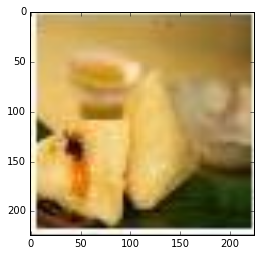

Top5 Prediction:
n07574426 Refection,
n07863547 Cannelloni,
n07866723 Egg roll, spring roll,
n07628068 Phyllo,
n07873348 Pigs in blankets
Time used: 0.212949991226 sec


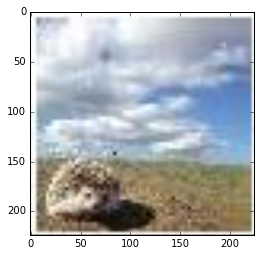

Top5 Prediction:
n01953762 Tiger cowrie, Cypraea tigris,
n02128598 Leopardess,
n03896526 Passe-partout,
n02137015 Genet, Genetta genetta,
n02027357 Least sandpiper, stint, Erolia minutilla
Time used: 0.213003158569 sec


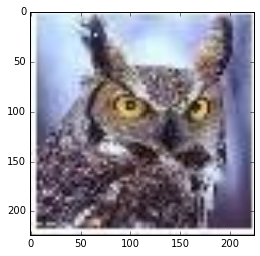

Top5 Prediction:
n01624833 Long-eared owl, Asio otus,
n01622483 Great horned owl, Bubo virginianus,
n01623880 Spotted owl, Strix occidentalis,
n01624115 Old World scops owl, Otus scops,
n01622352 Horned owl
Time used: 0.212433099747 sec


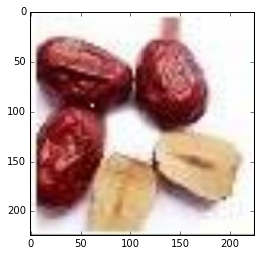

Top5 Prediction:
n07765073 Date,
n07765999 Jujube, Chinese date, Chinese jujube,
n07606058 Jujube,
n12197601 Kola nut, cola nut,
n13090871 Aril
Time used: 0.210171222687 sec


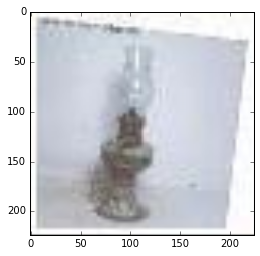

Top5 Prediction:
n03896526 Passe-partout,
n03437829 Girandole, girandola,
n04119360 Rummer,
n03549897 Hurricane lamp, hurricane lantern, tornado lantern, storm lantern, storm lamp,
n04380533 Table lamp
Time used: 0.199169874191 sec


In [82]:
# Get preprocessed batch (single image batch)
batchSet = PreprocessImage('./getPassCodeNew_2.jpeg', True)

for x in range(8):
    # Get prediction probability of 1000 classes from model
    time_start = time.time()
    batch = batchSet.next()
    prob = model.predict(batch)[0]
    # Argsort, get prediction index from largest prob to lowest
    pred = np.argsort(prob)[::-1]
    # Get top1 label
    # top1 = synset[pred[0]]
    # print("Top1: ", top1)
    # Get top5 label
    top5 = [synset[pred[i]] for i in range(5)]
    print "Top5 Prediction:\n%s" % ",\n".join(top5)
    print "Time used: %s sec" % (time.time() - time_start)